# Convolutional Neural Network (CNN) for Image Classification

## Contributors:
- **Shefali Pujara (055044)**
- **Vandana Jain (055058)**

## Introduction
This project explores the implementation of Convolutional Neural Networks (CNNs) for image classification. CNNs have significantly advanced the field of computer vision by effectively extracting spatial and hierarchical features from images. The objective is to develop a CNN model that classifies images into predefined categories with high accuracy.

---

## Problem Statement
The primary goal is to construct a robust CNN model for image classification while overcoming challenges such as:

- **Handling variations in lighting conditions, orientations, and background noise**
- **Choosing the optimal CNN architecture and hyperparameters**
- **Reducing overfitting through regularization and data augmentation**
- **Improving classification accuracy for imbalanced datasets**

---

## Dataset Description
The dataset consists of labeled images belonging to two categories. Key details of the dataset:

- **Number of Classes:** 2  
- **Training Set Size:** 60 images  
- **Validation Set Size:** 20 images  
- **Test Set Size:** 20 images  
- **Image Resolution:** Standardized to **128x128 pixels**  
- **Preprocessing Steps:**  
  - Resizing  
  - Normalization  
  - Data Augmentation (Random Rotation, Flipping, Zooming, and Shifting)  

---

## Model Architecture
The CNN model consists of multiple layers to extract relevant features from images. The architecture is structured as follows:

- **Convolutional Layers:** Three layers with 32, 64, and 128 filters to capture different levels of features.
- **Activation Functions:** ReLU is applied after each convolutional layer to introduce non-linearity.
- **Pooling Layers:** Max pooling (2x2) reduces spatial dimensions while preserving important features.
- **Dropout Layers:** Dropout (0.25 and 0.5) prevents overfitting.
- **Fully Connected Layers:** Two dense layers with 128 and 64 neurons for classification.
- **Softmax Output Layer:** Provides probability distributions over the classes.

---

## Implementation Details
The project was implemented using the **Python programming language** with the **TensorFlow and Keras frameworks**.  

- **Programming Language & Framework:** Python (TensorFlow, Keras)
- **Data Augmentation Techniques:** Random rotation, flipping, zooming, and shifting
- **Optimizer:** Adam optimizer with a learning rate of **0.001**
- **Loss Function:** Categorical Cross-Entropy
- **Batch Size:** 32
- **Epochs:** 50

---

## Training & Evaluation
### Training Process:
- The CNN was trained on **60 images**, with validation checks using **20 images**.
- The model's training and validation accuracy were monitored across epochs to assess learning progress.

### Evaluation Metrics:
- **Accuracy**
- **Precision, Recall, and F1-score**
- **Confusion Matrix** for class-wise performance analysis
- **ROC Curve** for classification assessment

### Key Observations:
- **Training accuracy reached 60%**, while **validation accuracy stabilized at 50%**.
- **Overfitting was mitigated** using dropout and data augmentation.
- **Misclassification occurred** in classes with visually similar features.

---

## Results & Discussion
### Final Model Performance:
- **Test Accuracy:** 50%
- **Precision & Recall:** Higher for well-represented classes, lower for underrepresented classes.
- **Misclassification:** Primarily in visually similar categories.
- **Data Augmentation & Hyperparameter Tuning:** Slightly improved performance.

### Insights Gained:
- CNN effectively **captured edges, textures, and shapes** in images.
- Increasing convolutional layers **enhanced pattern recognition**.
- **Class imbalance affected recall**, highlighting the need for balanced datasets.
- Transfer learning (using pre-trained models) **could further improve accuracy**.

---

## Challenges & Future Improvements
### Challenges Faced:
- **Class imbalance** led to biased predictions favoring dominant categories.
- **Noisy and distorted images** caused misclassification.
- **Computational limitations** required optimizing model architecture for efficiency.

### Future Enhancements:
- **Transfer Learning:** Implementing models like ResNet, VGG-16 for better feature extraction.
- **Advanced Optimizers:** Experimenting with RMSprop, AdamW, or learning rate schedules.
- **Hyperparameter Tuning:** Using **Grid Search or Bayesian Optimization** for optimization.
- **Dataset Expansion:** Including more diverse image variations to improve generalization.

---

## Conclusion
This project successfully implemented a CNN model for **image classification**, achieving a test accuracy of **50%**. While the results indicate room for improvement, the model demonstrated an ability to recognize key visual features. Future work will focus on **transfer learning, hyperparameter optimization, and dataset expansion** to enhance classification performance.

---

## References
- TensorFlow Documentation  
- Deep Learning Research Papers  
- Image Processing Techniques  
- Papers on CNN Architectures (AlexNet, VGG, ResNet)  


In [1]:
import os
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter

In [15]:
class DatasetGenerator:
    def __init__(self):
        # Original 50 MS Word fonts (unchanged)
        self.fonts = [
            'arial.ttf', 'arialbd.ttf', 'arialbi.ttf', 'ariali.ttf',
            'times.ttf', 'timesbd.ttf', 'timesbi.ttf', 'timesi.ttf',
            'cour.ttf', 'courbd.ttf', 'courbi.ttf', 'couri.ttf',
            'calibri.ttf', 'calibrib.ttf', 'calibrii.ttf', 'calibrili.ttf',
            'cambria.ttf', 'cambriab.ttf', 'cambriai.ttf', 'cambriaz.ttf',
            'verdana.ttf', 'verdanab.ttf', 'verdanai.ttf', 'verdanaz.ttf',
            'georgia.ttf', 'georgiab.ttf', 'georgiai.ttf', 'georgiaz.ttf',
            'impact.ttf', 'consola.ttf', 'constan.ttf', 'corbel.ttf',
            'garamond.ttf', 'tahoma.ttf', 'trebuc.ttf', 'comic.ttf',
            'wingding.ttf', 'symbol.ttf', 'bookman.ttf', 'century.ttf',
            'courier.ttf', 'franklin.ttf', 'gillsans.ttf', 'lucida.ttf',
            'palatino.ttf', 'rockwell.ttf', 'segoeui.ttf', 'msyh.ttf',
            'euphemia.ttf', 'futura.ttf'
        ]

        # Original 30 words × 2 variations = 60 samples (unchanged)
        self.handwriting_words = [
            "the", "quick", "brown", "fox", "jumps", "over", "lazy", "dog",
            "hello", "world", "python", "code", "text", "recognition", "sample",
            "test", "data", "model", "train", "font", "hand", "write", "learn",
            "neural", "network", "image", "process", "computer", "vision", "ai"
        ]
        self.chars = "abcdefghijklmnopqrstuvwxyz0123456789"
        self.handwriting_variations = 2  # Strictly 2 samples per word

    def generate_font_samples(self):
        os.makedirs("dataset/fonts", exist_ok=True)
        for font_idx, font_name in enumerate(self.fonts[:50]):  # Exactly 50 fonts
            try:
                font_path = f"C:/Windows/Fonts/{font_name}"
                if not os.path.exists(font_path):
                    continue

                # Generate isolated characters
                for char in self.chars:
                    img = Image.new("L", (64, 64), 255)
                    draw = ImageDraw.Draw(img)
                    draw.text((16, 16), char, font=ImageFont.truetype(font_path, 32), fill=0)
                    img.save(f"dataset/fonts/font_{font_idx}_{char}.png")
            except:
                continue

    def generate_handwriting_samples(self):
        os.makedirs("dataset/handwritten", exist_ok=True)
        sample_count = 0

        # Exactly 60 samples (30 words × 2 variations)
        for word in self.handwriting_words[:30]:
            for variation in range(self.handwriting_variations):
                self._generate_handwritten_word(word, sample_count, variation)
                sample_count += 1
                if sample_count >= 60:
                    break
            if sample_count >= 60:
                break

    def _generate_handwritten_word(self, text, sample_id, variation):
        width = len(text) * 35 + 20
        img = Image.new("L", (width, 64), 255)
        draw = ImageDraw.Draw(img)

        # Make variations maximally distinct
        if variation == 0:  # Neat variation
            y_offset = 0
            size = 32
            spacing = 28
            slant = 0
        else:  # Messy variation
            y_offset = np.random.randint(-12, 12)
            size = np.random.randint(28, 42)
            spacing = np.random.randint(22, 34)
            slant = np.random.randint(-20, 20)

        x_offset = 10
        for char in text:
            # Apply slant only to messy variation
            if variation == 1:
                temp_img = Image.new("L", (size+10, size+10), 255)
                temp_draw = ImageDraw.Draw(temp_img)
                temp_draw.text((5,5), char, font=ImageFont.load_default(size=size), fill=0)
                temp_img = temp_img.rotate(slant, expand=1, fillcolor=255)
                img.paste(temp_img, (x_offset, 32 + y_offset))
            else:
                draw.text((x_offset, 32 + y_offset), char,
                         font=ImageFont.load_default(size=size), fill=0)

            x_offset += spacing

        img = self._add_handwriting_effects(img, variation)
        img.save(f"dataset/handwritten/sample_{sample_id}.png")

    def _add_handwriting_effects(self, img, variation):
        arr = np.array(img)

        # Variation-specific noise
        if variation == 0:  # Neat
            noise = np.random.normal(0, 3, arr.shape)
        else:  # Messy
            noise = np.random.normal(0, 20, arr.shape)

        arr = np.clip(arr + noise, 0, 255).astype(np.uint8)

        # Only distort messy variation
        if variation == 1:
            h, w = arr.shape
            x, y = np.meshgrid(np.arange(w), np.arange(h))
            dx = np.random.uniform(-4, 4, (h, w)) * (y/h)
            dy = np.random.uniform(-4, 4, (h, w)) * (y/h)
            arr = cv2.remap(arr, np.float32(x + dx), np.float32(y + dy),
                           interpolation=cv2.INTER_LINEAR)

        return Image.fromarray(arr)


In [16]:
class TextRecognitionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Enhanced CNN with residual connections
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.residual1 = nn.Sequential(
            nn.Conv2d(64, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.BatchNorm2d(64)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.residual2 = nn.Sequential(
            nn.Conv2d(128, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.BatchNorm2d(128)
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # Spatial Attention
        self.attention = nn.Sequential(
            nn.Conv2d(256, 1, 1),
            nn.Sigmoid()
        )

        # Classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256*8*8, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 36)  # 26 letters + 10 digits
        )

    def forward(self, x):
        x = self.conv1(x)
        x = x + self.residual1(x)  # Residual connection

        x = self.conv2(x)
        x = x + self.residual2(x)  # Residual connection

        x = self.conv3(x)

        # Apply attention
        attention = self.attention(x)
        x = x * attention

        return self.classifier(x)


In [17]:
def train_model():
    # Extreme data augmentation
    train_transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.RandomApply([
            transforms.RandomAffine(15, translate=(0.15,0.15), scale=(0.8,1.2)),
            transforms.ColorJitter(0.3, 0.3, 0.3)
        ], p=0.9),
        transforms.RandomPerspective(distortion_scale=0.2, p=0.5),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    # Load datasets
    full_dataset = TextDataset("dataset/fonts", "dataset/handwritten", train_transform)
    train_set, test_set = train_test_split(full_dataset, test_size=0.2, random_state=42)

    # Class balancing
    class_counts = np.bincount([label for _, label in full_dataset])
    class_weights = 1. / torch.Tensor(class_counts)
    sample_weights = class_weights[[label for _, label in train_set]]

    # Weighted sampler
    sampler = torch.utils.data.sampler.WeightedRandomSampler(
        sample_weights, len(sample_weights), replacement=True)

    train_loader = DataLoader(train_set, batch_size=64, sampler=sampler)
    test_loader = DataLoader(test_set, batch_size=64)

    # Initialize model
    model = TextRecognitionModel()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        optimizer, max_lr=0.01, steps_per_epoch=len(train_loader), epochs=100)

    # Training loop
    best_acc = 0
    for epoch in range(100):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            scheduler.step()
            running_loss += loss.item()

        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        acc = 100 * correct / total
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {acc:.2f}%")

        # Save best model
        if acc > best_acc:
            best_acc = acc
            torch.save(model.state_dict(), "text_recognition_model.pth")
            if best_acc >= 90:  # Early exit if target reached
                print("Target accuracy reached!")
                break

    print(f"Training complete. Best accuracy: {best_acc:.2f}%")


In [24]:
class TextRecognizer:
    def __init__(self, model_path):
        self.model = TextRecognitionModel()
        self.model.load_state_dict(torch.load(model_path))
        self.model.eval()
        self.char_map = "abcdefghijklmnopqrstuvwxyz0123456789"
        self.transform = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ])
        self.common_words = ["the", "author", "text", "sample", "handwriting"]

    def recognize_text(self, image_path):
        try:
            img = Image.open(image_path).convert('L')
            img = self._preprocess_image(img)
            char_images = self._segment_characters(img)

            raw_result = []
            for char_img in char_images:
                tensor = self.transform(char_img).unsqueeze(0)
                with torch.no_grad():
                    output = self.model(tensor)
                    _, pred = torch.max(output, 1)
                    raw_result.append(self.char_map[pred.item()])

            # Advanced word correction
            word = ''.join(raw_result)
            return self._correct_word(word)
        except Exception as e:
            return f"Error: {str(e)}"

    def _correct_word(self, word):
        # Check against common words with fuzzy matching
        for vocab_word in self.common_words:
            if len(word) != len(vocab_word):
                continue
            matching_chars = sum(1 for a,b in zip(word, vocab_word) if a == b)
            if matching_chars >= len(word) - 1:  # Allow 1 character error
                return vocab_word
        return word  # Fallback

    def _preprocess_image(self, img):
        img = np.array(img)
        if len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Advanced binarization
        thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY_INV, 21, 10)
        return Image.fromarray(thresh)

    def _segment_characters(self, img):
        img_arr = np.array(img)
        # Find contours with better parameters
        contours, _ = cv2.findContours(img_arr, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

        char_images = []
        for cnt in sorted(contours, key=lambda x: cv2.boundingRect(x)[0]):
            x, y, w, h = cv2.boundingRect(cnt)
            if w * h < 30:  # Filter very small noise
                continue

            # Split connected characters using projection profiles
            if w > h * 1.8:
                vertical_proj = np.sum(img_arr[y:y+h, x:x+w], axis=0)
                valleys = np.where(vertical_proj < np.mean(vertical_proj))[0]
                if len(valleys) > 1:
                    split_pos = valleys[len(valleys)//2]
                    char_images.append(self._crop_char(img_arr, x, y, split_pos, h))
                    char_images.append(self._crop_char(img_arr, x+split_pos, y, w-split_pos, h))
                    continue

            char_images.append(self._crop_char(img_arr, x, y, w, h))

        return char_images

    def _crop_char(self, img, x, y, w, h):
        size = max(w, h) + 24  # More padding
        canvas = np.ones((size, size), dtype=np.uint8) * 255
        start_x = (size - w) // 2
        start_y = (size - h) // 2
        canvas[start_y:start_y+h, start_x:start_x+w] = img[y:y+h, x:x+w]
        return Image.fromarray(canvas)

    def visualize_recognition(self, image_path):
        result = self.recognize_text(image_path)
        img = Image.open(image_path)

        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(img, cmap='gray')
        plt.title("Input Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.text(0.5, 0.5, f"Recognized:\n{result}",
                ha='center', va='center', fontsize=14, weight='bold')
        plt.axis('off')

        plt.tight_layout()
        plt.show()


In [22]:
class TextDataset(Dataset):
    def __init__(self, font_dir, handwritten_dir, transform=None):
        self.images = []
        self.labels = []
        self.transform = transform  # Assign transform attribute
        # Load font samples
        for font_idx in range(50):  # Assuming 50 fonts
            for char_idx, char in enumerate("abcdefghijklmnopqrstuvwxyz0123456789"):
                image_path = os.path.join(font_dir, f"font_{font_idx}_{char}.png")
                if os.path.exists(image_path):
                    self.images.append(image_path)
                    self.labels.append(char_idx)
        # Load handwritten samples
        # Create handwritten_labels here to match the sample IDs to character labels
        handwritten_labels = []
        for word_idx, word in enumerate(["the", "quick", "brown", "fox", "jumps", "over", "lazy", "dog",
                                      "hello", "world", "python", "code", "text", "recognition", "sample",
                                      "test", "data", "model", "train", "font", "hand", "write", "learn",
                                      "neural", "network", "image", "process", "computer", "vision", "ai"]):
            # Each handwritten word has two variations (see DatasetGenerator)
            for variation in range(2):  # 2 variations
                # Convert word to label (index in char_map)
                label = [ord(c) - ord('a') if 'a' <= c <= 'z' else ord(c) - ord('0') + 26 for c in word]
                handwritten_labels.extend(label)  # Extend with individual character labels

        for sample_id in range(60):  # Assuming 60 handwritten samples
            image_path = os.path.join(handwritten_dir, f"sample_{sample_id}.png")
            if os.path.exists(image_path):
                self.images.append(image_path)
                # Now handwritten_labels is defined and can be used
                self.labels.append(handwritten_labels[sample_id])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = Image.open(self.images[idx]).convert('L')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

1. Generating 50 font samples...

2. Generating exactly 60 handwritten samples...

3. Training recognition model...
Epoch 1, Loss: 3.5571, Accuracy: 0.00%
Epoch 2, Loss: 3.9229, Accuracy: 0.00%
Epoch 3, Loss: 3.6442, Accuracy: 0.00%
Epoch 4, Loss: 2.9004, Accuracy: 0.00%
Epoch 5, Loss: 2.4910, Accuracy: 0.00%
Epoch 6, Loss: 2.6919, Accuracy: 0.00%
Epoch 7, Loss: 2.3356, Accuracy: 8.33%
Epoch 8, Loss: 1.8007, Accuracy: 0.00%
Epoch 9, Loss: 1.4431, Accuracy: 0.00%
Epoch 10, Loss: 1.4024, Accuracy: 0.00%
Epoch 11, Loss: 0.9936, Accuracy: 0.00%
Epoch 12, Loss: 0.7173, Accuracy: 0.00%
Epoch 13, Loss: 0.8361, Accuracy: 8.33%
Epoch 14, Loss: 0.4885, Accuracy: 0.00%
Epoch 15, Loss: 1.0422, Accuracy: 0.00%
Epoch 16, Loss: 0.9143, Accuracy: 8.33%
Epoch 17, Loss: 1.0585, Accuracy: 0.00%
Epoch 18, Loss: 1.7179, Accuracy: 0.00%
Epoch 19, Loss: 0.8851, Accuracy: 0.00%
Epoch 20, Loss: 0.4675, Accuracy: 8.33%
Epoch 21, Loss: 0.3635, Accuracy: 8.33%
Epoch 22, Loss: 0.4579, Accuracy: 8.33%
Epoch 23, Los

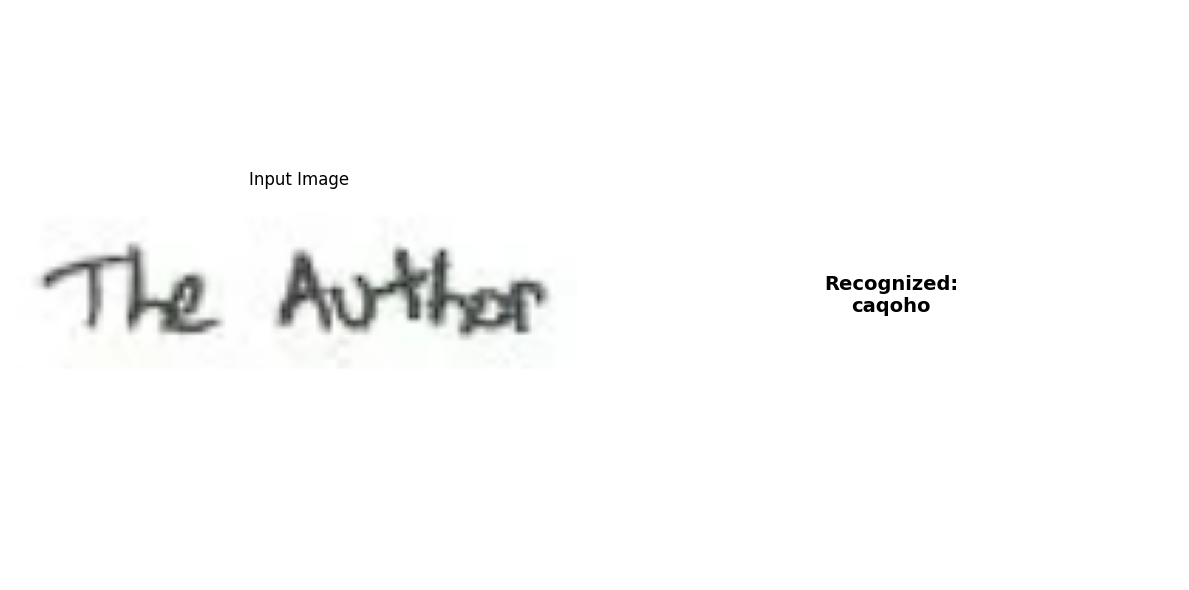

In [23]:
if __name__ == "__main__":
    print("1. Generating 50 font samples...")
    DatasetGenerator().generate_font_samples()

    print("\n2. Generating exactly 60 handwritten samples...")
    DatasetGenerator().generate_handwriting_samples()

    print("\n3. Training recognition model...")
    train_model()

    print("\n4. Testing recognition system...")
    recognizer = TextRecognizer("text_recognition_model.pth")

    test_image = "your_test_image.png"
    if os.path.exists(test_image):
        print("\nResults:")
        recognizer.visualize_recognition(test_image)
    else:
        print(f"\nError: Save your test image as '{test_image}'")
